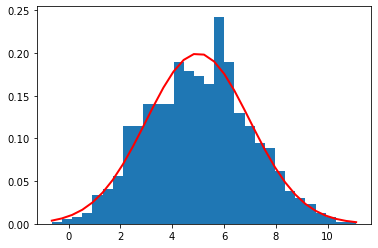

In [8]:
#  https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
import numpy as np
import matplotlib.pyplot as plt

# random.standard_normal(size=...)
s = np.random.standard_normal(8000)
# np.random.normal(mu, sigma, size=...)

# matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, 
# cumulative=False, bottom=None, histtype='bar', align='mid', 
# orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, 
# data=None, **kwargs)
sigma=2
mu=5
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

[ 1.07574717 -1.03087903 -0.14373585 ... -1.080925   -0.20217154
  0.4700868 ] [ 2.38357968 -3.17871453  0.13591911 ...  5.30433459 -2.25305646
  1.09083209]


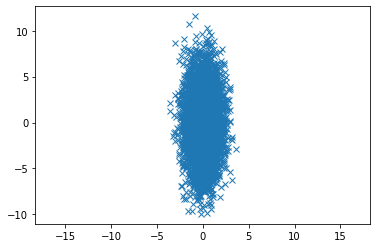

In [15]:
# Багатовимірний нормальний розподіл 
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html
mean = [0, 0]
cov = [[1, 0], [0, 10]] 
x, y = np.random.multivariate_normal(mean, cov, 5000).T # Т означає транспоновану матрицю 
print(x,y)
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [39]:
# "довірчий еліпсоїд" https://matplotlib.org/devdocs/gallery/statistics/confidence_ellipse.html
# https://matplotlib.org/devdocs/gallery/statistics/confidence_ellipse.html#different-number-of-standard-deviations

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


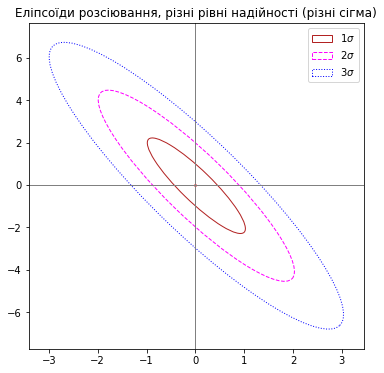

In [38]:
#  Застовування: 
mean = [0, 0]
cov = [[1, -2], [-2, 5]]  # перевіримо, щоб була додатньо визначена

x, y = np.random.multivariate_normal(mean, cov, 5000).T
fig, ax_nstd = plt.subplots(figsize=(6, 6))

ax_nstd.axvline(c='grey', lw=1)
ax_nstd.axhline(c='grey', lw=1)
confidence_ellipse(x, y, ax_nstd, n_std=1,
                   label=r'$1\sigma$', edgecolor='firebrick')
confidence_ellipse(x, y, ax_nstd, n_std=2,
                   label=r'$2\sigma$', edgecolor='fuchsia', linestyle='--')
confidence_ellipse(x, y, ax_nstd, n_std=3,  
                   label=r'$3\sigma$', edgecolor='blue', linestyle=':')  # n_std=1 68 відсотків, n_std=2: 95 

ax_nstd.scatter(mu[0], mu[1], c='red', s=3)
ax_nstd.set_title('Еліпсоїди розсіювання, різні рівні надійності (різні сігма)')
ax_nstd.legend()
plt.show()